### Описание проекта

Что бы успешно продавать игры онлайн по заданным регионам в следующем году, мы должны понять на какие жанры, платформы и какую аудиторию будет эффективнее всего потратить рекламный бюджет. Для этого проанализируем данные за предыдущие годы со всех сторон, выявим актуальный период, и спрогнозируем наиболее доходные платформы, жанры и рейтинги для трех разных регионов - Северная Америка, Европа и Япония. Выберем наиболее перспективные из них.


#### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

try:
    from joypy import joyplot
except:
    ! pip install joypy
    from joypy import joyplot




pd.set_option('chained_assignment', None)

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv()

#### Подготовим данные
* Заменим названия столбцов (приведем к нижнему регистру).
* Преобразуем данные в нужные типы.
* Обработаем пропуски. 
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Найдем явные дубликаты

In [4]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют

#### Заменим названия столбцов

In [5]:
#заменем названия столбцов на названия в змеином стиле
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Преобразуем данные в нужные типы, заполним пропущенные значения

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Обработка пропусков в годах релизов
Так как пропусков в годах релизов всего 1,6%, а на разных платформах игры с одинаковыми названиями выходили в разные годы, просто удалим эти пропуски. И преобразуем в int

In [9]:
data = data[data['year_of_release'].notna()]
data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
#посмотрим на уникальные значения столбца critic_score
data['critic_score'].unique()
#все значения целые, приведем их к типу int

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
#заполним пропуски нетипичным значением -1
data['critic_score'] = data['critic_score'].fillna(-1)
#приведем к типу int
data['critic_score'] = data['critic_score'].astype(int)

In [12]:
#посмотрим на уникальные значения столбца critic_score
data['user_score'].unique()
#приведем значения к типу float

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме nan так же присутствует значение tbd. Аббривеатура - будет уточнение. Для нас оно равносильно пропуску.

In [13]:
#заполним пропуски нетипичным значением
data['user_score'] = data['user_score'].fillna(-1)
# значение tbd - To Be Determined заменим так же -1, для нас это равносильно пропуску
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
#приведем к типу float
data['user_score'] = data['user_score'].astype(float)
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

**Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.**

In [14]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

ESRB это рейтинг для США и Канады, в других регионах он может быть просто не присвоен. По этому заменим его на значение 'unknown'

In [15]:
# Если у игры пропуски в колонке rating, логично их заменить значением unknown
data['rating'] = data['rating'].fillna('unknown')

In [16]:
data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

Оставшиеся пропуски просто удалим, они малозначительны.

In [17]:
data = data.dropna()

#### Причины, по которым могли появиться пропуски

Уверенно можно сказать про ESRB рейтинг. Это рейтинг для США и Канады, в других регионах он может быть просто не присвоен.

Пропуски в году выпуска, названиях игр скорее всего связаны с ошибками заполнения, либо выгрузки файла.

Оценки пользователей и критиков, названия жанра, возможно, просто отсутстыуют, ввиду того, что датафрейм содержит данные с 1980 года. Так же возможны ошибки при работе с данными


In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

#### Проведем исследовательский анализ данных

In [19]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

#### Посмотрим, сколько игр выпускалось в разные годы, и важны ли данные за все периоды.

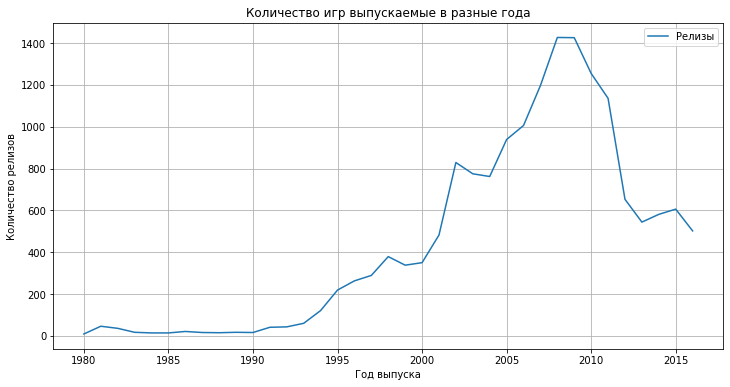

In [20]:
#Строим график количества релизов в разные годы
plt.figure(figsize=(12,6))
plt.plot(data.groupby('year_of_release')['name'].count(), label='Релизы')
plt.legend()
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.grid(True)
plt.show()

До 1994 года релизы игр были единичными. После 1994 игровая индустрия начала набирать обороты вплоть до 2008 года, когда количество выпускаемых игр начало резко сокращаться. Возможно, с ростом технологий и возможностей, новые игры стали требовать больших трудозатрат для их выпуска.

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
#Сортируем платформы по суммарным продажам
most_sailing_platform = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()

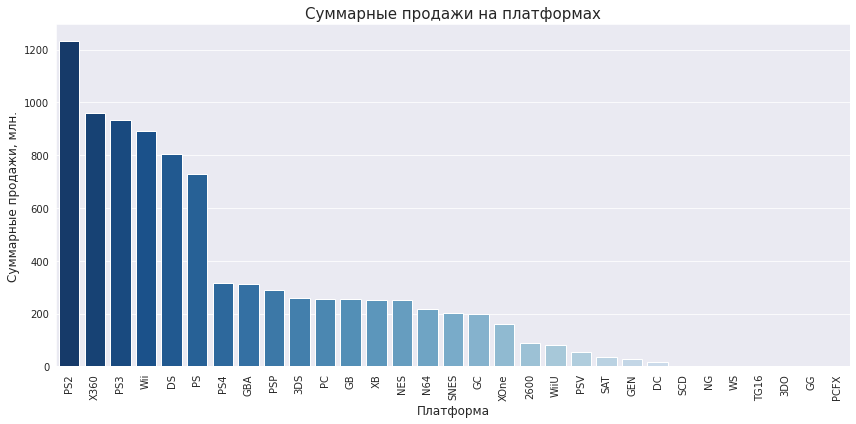

In [22]:
#Строим график для платформ по суммарным продажам
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.title('Суммарные продажи на платформах',fontsize=15)
sns.barplot(data=most_sailing_platform, x='platform', y='total_sales', palette='Blues_r')
plt.xticks(rotation=90)
plt.xlabel('Платформа',fontsize=12)
plt.ylabel('Суммарные продажи, млн.',fontsize=12)
plt.tight_layout()

PS2 - это платформа, которая совершила продаж больше всех остальных

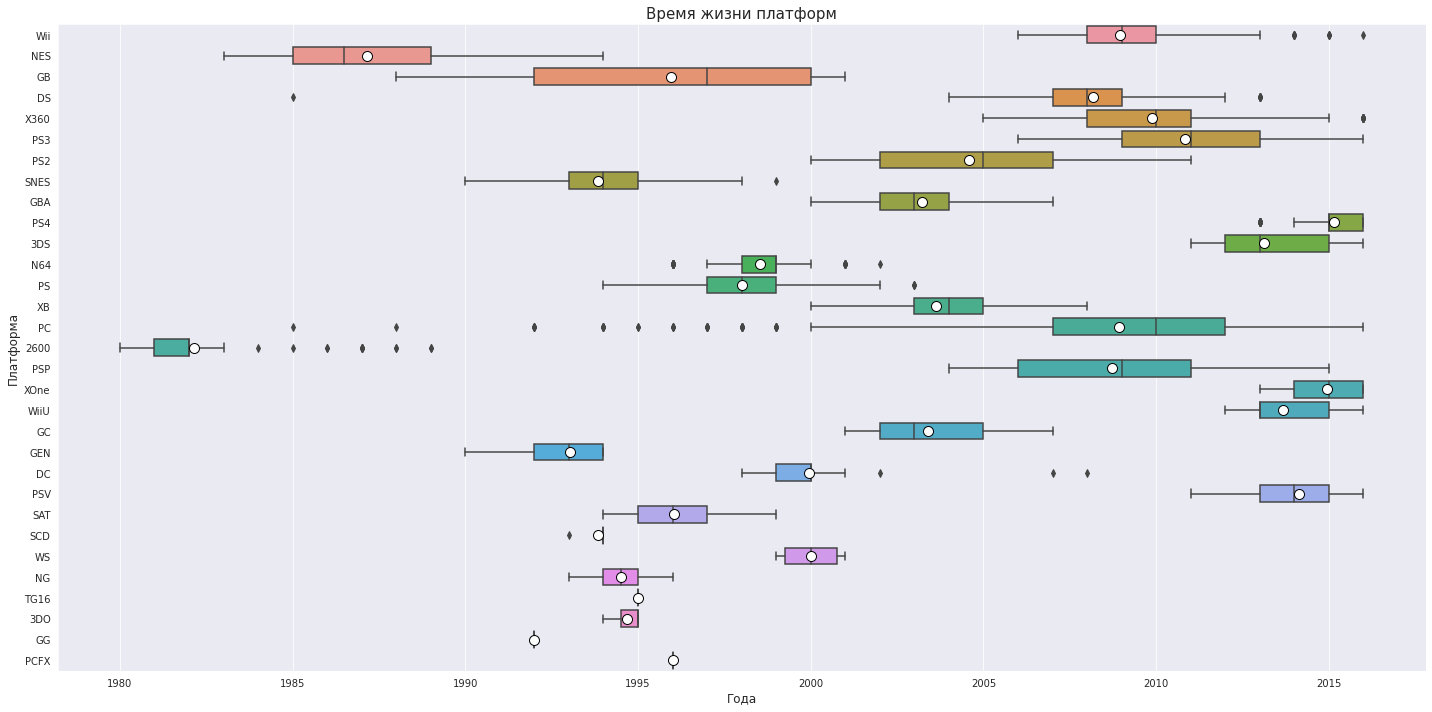

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x='year_of_release', y='platform', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Время жизни платформ', fontsize=15)
plt.xlabel('Года', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
#plt.xlim(0, 2)
plt.tight_layout()

/opt/conda/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (1995) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "


Text(0.5, 1.0, 'Время жизни платформ')

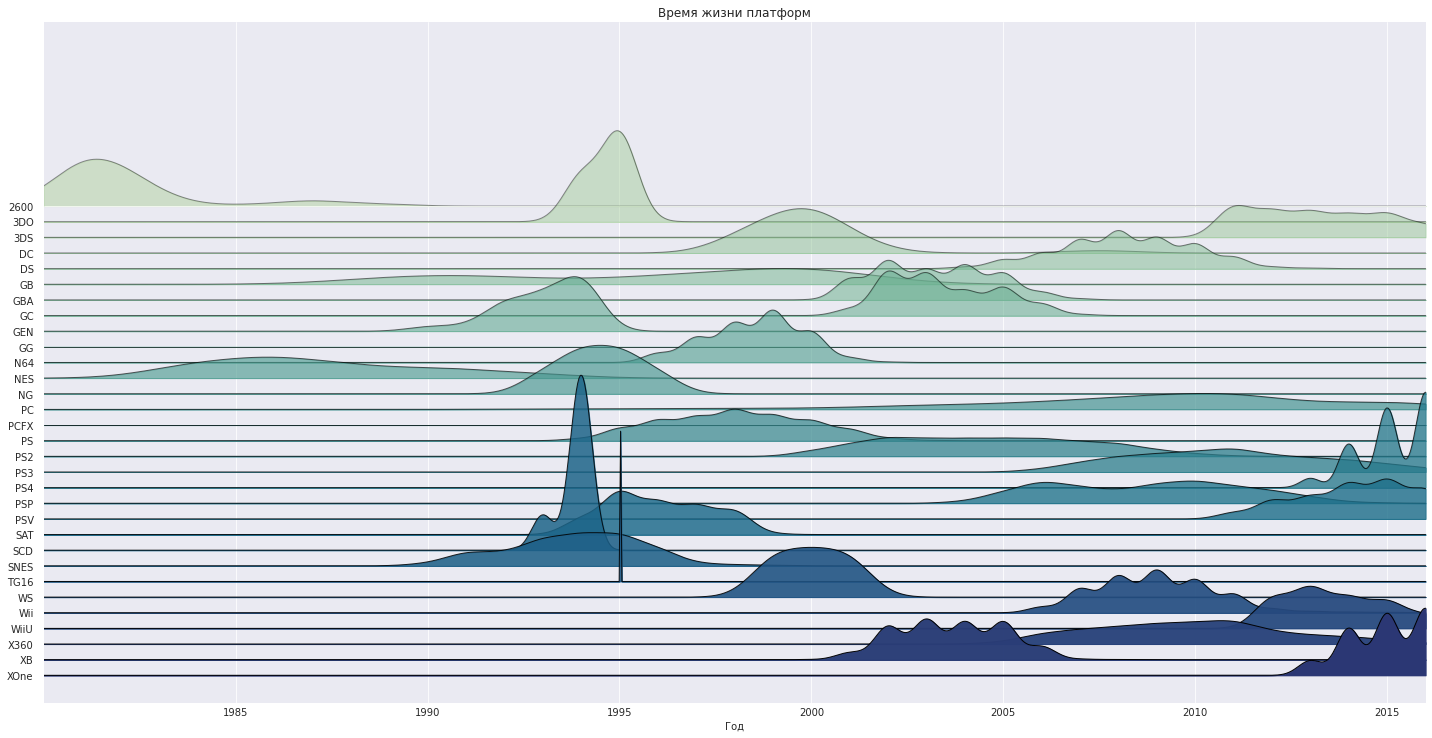

In [24]:


joyplot(data, by='platform', column='year_of_release', \
        colormap=sns.color_palette("crest", as_cmap=True), overlap=4, fade=True,\
        x_range=[1980,2016], linewidth=1, figsize= (20,10), grid=True)
plt.xlabel('Год')
plt.title('Время жизни платформ')

Из графиков видно, что многие платформы уже отжили свое, или отживают. В реальнсти остается всего 4-5 платформ, которые продолжат свой жизненный цикл. Логично было бы ориентироваться на них. Так же мы видим две платформы, кторые резво начали свое существование в 2013 году - это PS4 и XOne. Во многом затухание других платформ связано с их выходом. Скорее всего они заменят все другие стационарные платформы. А мобильные платформы, такие как 3Ds и DS продолжат существовать и приносить доход, по крайней мере, до выхода их прямых конкурентов. Что касается PC, он вообще, похоже, бессмертный.

Так же, на диаграмме размаха можно заметить странный выброс у приставки DS, в тот год, когда она еще не существовала. Удалим этот артефакт

In [25]:
data = data.drop(data.loc[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)].index)


In [26]:
# создадим сводную таблицу платформ что бы расчитать время их жизни
platform_life_time = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
#переименуем столбцы
platform_life_time.set_axis(['platform', 'first_year', 'last_year'], axis='columns', inplace=True)
#расчитываем время жизи платформы, с учетом года ее выхода
platform_life_time['length'] = platform_life_time.last_year - platform_life_time.first_year + 1

print('Средний срок жизни платформы:',np.round(platform_life_time['length'].mean()).astype(int), 'лет')

Средний срок жизни платформы: 8 лет


/tmp/ipykernel_1472/2089784093.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  platform_life_time.set_axis(['platform', 'first_year', 'last_year'], axis='columns', inplace=True)


Две новые стационарные платформы активно подавляют своих конкурентов. Так как обе приставки вышли в конце 2013 года, возьмем актуальный перриод, начиная с начала 2014 года включительно, что бы не захватить отжившие тренды

Возьмем все платформы, совершавшие продажи в этот актуальный период

In [27]:
data_actual = data[data['year_of_release']>=2014]

Построим диаграмму размаха по глобальным продажам игр в активный период

In [28]:
data_platform_median = pd.pivot_table(data_actual, index='platform', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False)
data_platform_median

,total_sales
platform,
XOne,0.205
WiiU,0.190
PS4,0.185
Wii,0.180
X360,0.180
PS3,0.110
3DS,0.090
PC,0.060
PSV,0.040


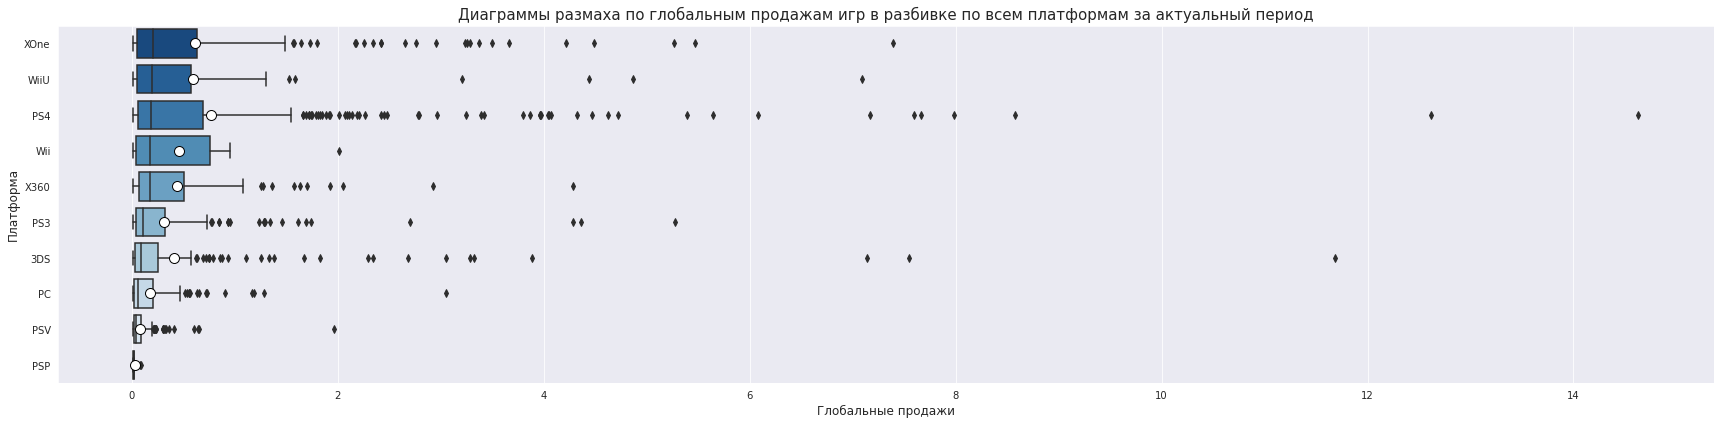

In [29]:
# Для сортировки медиан выберем наш порядок по медиане продаж
data_platform_median = pd.pivot_table(data_actual, index='platform', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False)
order_platform = data_platform_median.index
# Построим график
plt.figure(figsize=(24,6))
sns.boxplot(data=data_actual, x='total_sales', y='platform', showmeans=True, palette='Blues_r', order=order_platform,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по всем платформам за актуальный период', fontsize=15)
plt.xlabel('Глобальные продажи', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
#plt.xlim(0, 2)
plt.tight_layout()

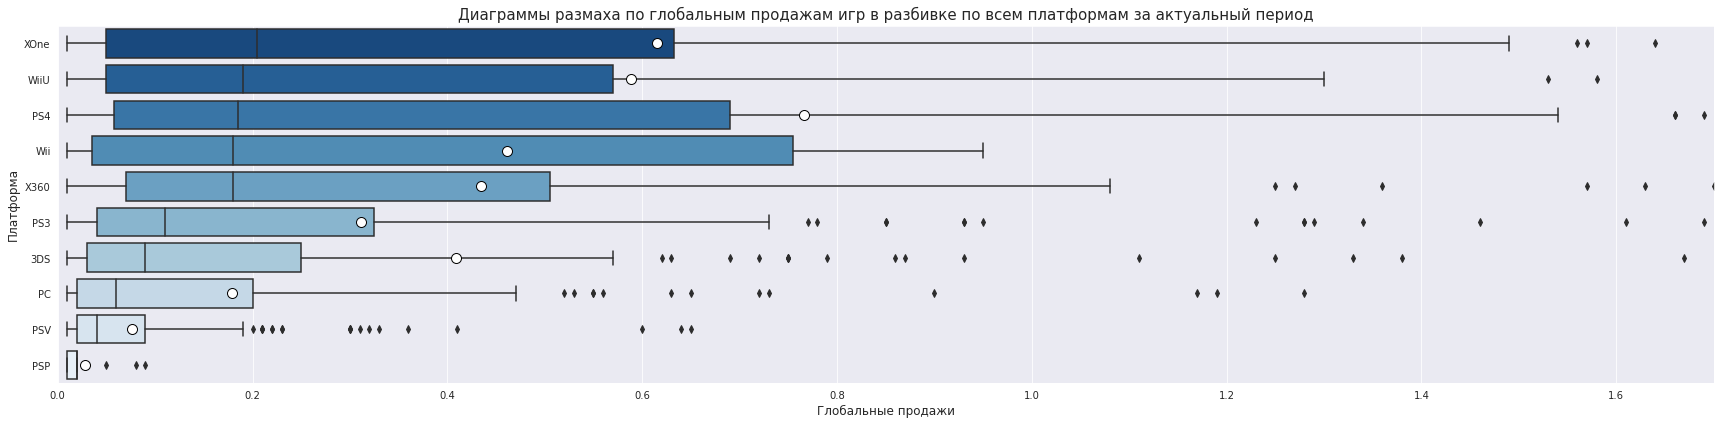

In [30]:
plt.figure(figsize=(24,6))
sns.boxplot(data=data_actual, x='total_sales', y='platform', showmeans=True, palette='Blues_r', order=order_platform,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по всем платформам за актуальный период', fontsize=15)
plt.xlabel('Глобальные продажи', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
plt.xlim(0, 1.7)
plt.tight_layout()

Стабильную медиану продажи показывает приставка XOne, хоть она сильно отстает по суммарным продажам от PS4. 
WiiU так же показывает стабильнкю высокую медиану, но суммарные продажи малы. 
У Wii медиана почти такая же как и у WiiU но суммарные продажи крайне малы, и скорее всего, они будут стремиться к 0. 
Больше всего продаж за актуальный период совершает PS4, но как видно из графика размаха этот успех вызван одиночными выбросами - хитами продаж
На такие игры нам следует обратить внимание, продажи будут сильно завиисеть от выхода продолжений и популярности этих игр.  
Так же их предшественники PS3 и X360 тоже приносят доход и имеют свои хиты, которые держат эти приставки на плаву, скорее всего они будут вытесняться новым поколением платформ. 
Медиана продаж у портативной приставки 3DS ниже, но она показывает хорошие суммарные продажи, имеет своего преданного покупателя, не смотря на то, что платформе уже 14 лет, для платформы было выпущено несколько высокоприбыльных хитов.
PC, PSV, PSP выглядат аутсайдерами на фоне остальных.
Надо смотеть на продажи отдельно по регионам, и только тогда делать выводы для каких платформ и игр запускать рекламную кампанию.



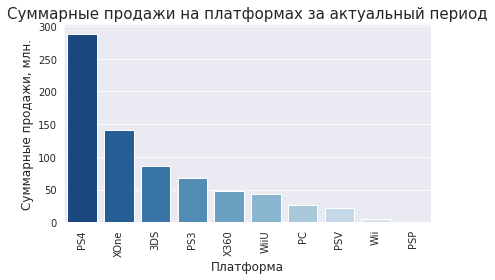

In [31]:
#Сортируем платформы по суммарным продажам
most_sailing_platform_actual = data_actual.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
#Строим график для платформ по суммарным продажам
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
plt.title('Суммарные продажи на платформах за актуальный период',fontsize=15)
sns.barplot(data=most_sailing_platform_actual, x='platform', y='total_sales', palette='Blues_r')
plt.xticks(rotation=90)
plt.xlabel('Платформа',fontsize=12)
plt.ylabel('Суммарные продажи, млн.',fontsize=12)
plt.tight_layout()

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [32]:
# Комментарий ревьюера 2
data.year_of_release.min()

1980

In [33]:
data_ps4_user = data_actual.query('platform == "PS4" & user_score != -1')
data_ps4_critic = data_actual.query('platform == "PS4" & critic_score != -1')


print(f'Корреляция между оценкой пользователей и продажами для PS4: {data_ps4_user.user_score.corr(data_ps4_user.total_sales):.1}')
print(f'Корреляция между оценкой критиков и продажами для PS4: {data_ps4_critic.critic_score.corr(data_ps4_critic.total_sales):.2}')

Корреляция между оценкой пользователей и продажами для PS4: -0.04
Корреляция между оценкой критиков и продажами для PS4: 0.4


/tmp/ipykernel_1472/1829592013.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_1472/1829592013.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


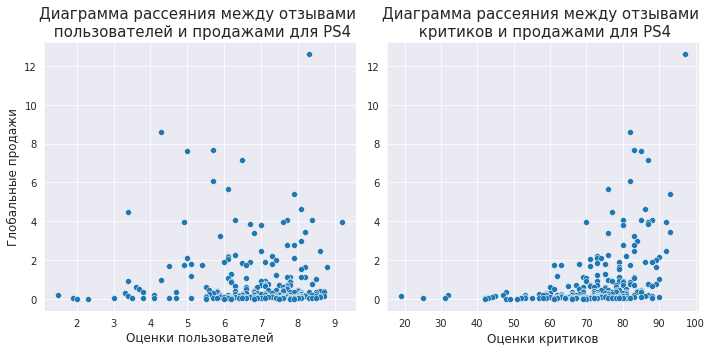

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=data_ps4_user, x="user_score", y="total_sales", palette='Blues_r'
)
plt.title('Диаграмма рассеяния между отзывами \n пользователей и продажами для PS4', fontsize=15)
plt.xlabel('Оценки пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=data_ps4_critic, x="critic_score", y="total_sales", palette='Blues_r'
)
plt.title('Диаграмма рассеяния между отзывами \n критиков и продажами для PS4', fontsize=15)
plt.xlabel('Оценки критиков', fontsize=12)
plt.ylabel(None)
plt.tight_layout()

Между оценкой пользователей и продажами наблюдается слабая обратная корреляционная связь.

Между оценкой критиков и продажами наблюдается прямая средняя корреляционная связь.

При прогнозе продаж надежнее пологаться на отзывы критиков.

#### Соотнесем выводы с продажами игр на других платформах

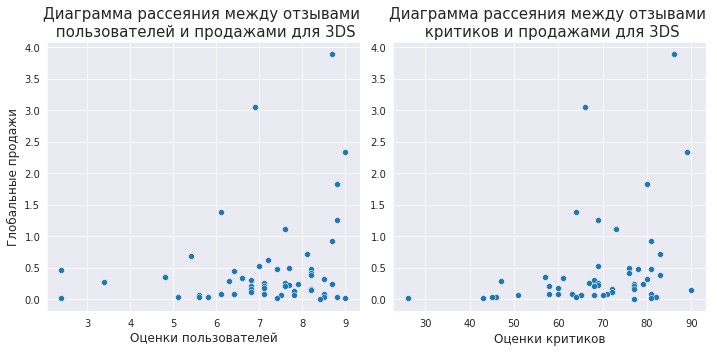

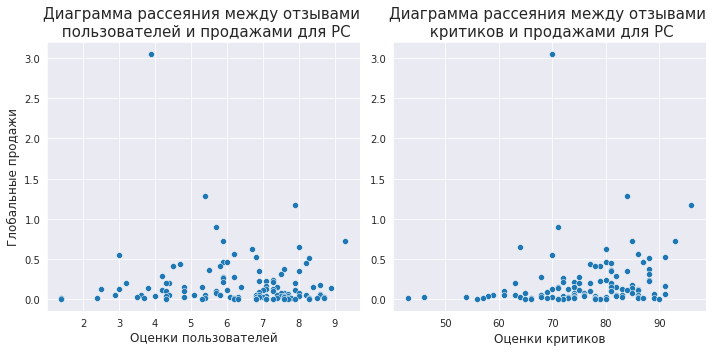

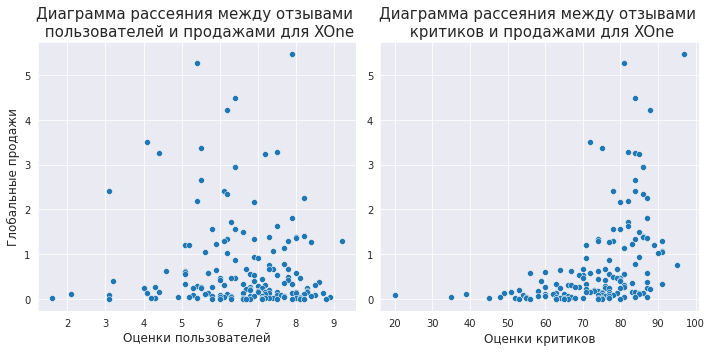

In [36]:
for platform in ['3DS','PC','XOne']:
    data_platform_user = data_actual.query('platform == @platform & user_score != -1')    
    data_platform_critic = data_actual.query('platform == @platform & critic_score != -1')

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(
    data=data_platform_user, x="user_score", y="total_sales",
    )
    plt.title('Диаграмма рассеяния между отзывами \n пользователей и продажами для {}'.format(platform), fontsize=15)
    plt.xlabel('Оценки пользователей', fontsize=12)
    plt.ylabel('Глобальные продажи',fontsize=12)
    plt.subplot(1, 2, 2)
    sns.scatterplot(
    data=data_platform_critic, x="critic_score", y="total_sales",
    )
    plt.title('Диаграмма рассеяния между отзывами \n критиков и продажами для {}'.format(platform), fontsize=15)
    plt.xlabel('Оценки критиков', fontsize=12)
    plt.ylabel(None)
    plt.tight_layout()

In [37]:
for platform in ['3DS','PC','XOne']:
    data_platform_user = data_actual.query('platform == @platform & user_score != -1')    
    data_platform_critic = data_actual.query('platform == @platform & critic_score != -1')
    print('-'*75)  
    print(f'Корреляция между оценкой пользователей и продажами для \
    {platform}: {data_platform_user.user_score.corr(data_platform_user.total_sales):.1}')
    print(f'Корреляция между оценкой критиков и продажами для \
    {platform}: {data_platform_critic.critic_score.corr(data_platform_critic.total_sales):.2}')
print('-'*75)

---------------------------------------------------------------------------
Корреляция между оценкой пользователей и продажами для     3DS: 0.2
Корреляция между оценкой критиков и продажами для     3DS: 0.31
---------------------------------------------------------------------------
Корреляция между оценкой пользователей и продажами для     PC: -0.07
Корреляция между оценкой критиков и продажами для     PC: 0.17
---------------------------------------------------------------------------
Корреляция между оценкой пользователей и продажами для     XOne: -0.07
Корреляция между оценкой критиков и продажами для     XOne: 0.43
---------------------------------------------------------------------------


Для XOne можно сделать те же выводы что и для PS4, данные очень похожи.

Для 3DS зависимость продаж от оценок пользователя - прямая, в отличие от PS4, и попадает в классификацию слабой прямой зависимости.  
Зависимость продаж от оценок критиков, так же прямая. Прямая средняя. Но слабее чем у PS4 и XOne.

Для PC зависимость продаж от оценок пользователя - слабая обратная корреляционная связь.
Зависимость продаж от оценок критиков - слабая прямая.

#### Посмотрим на общее распределение игр по жанрам.

In [38]:
data_genre = data_actual[['genre', 'total_sales']].reset_index(drop=True)
data_genre_median = pd.pivot_table(data_genre, index='genre',aggfunc='median').sort_values('total_sales', ascending=False)
my_order = data_genre_median.index

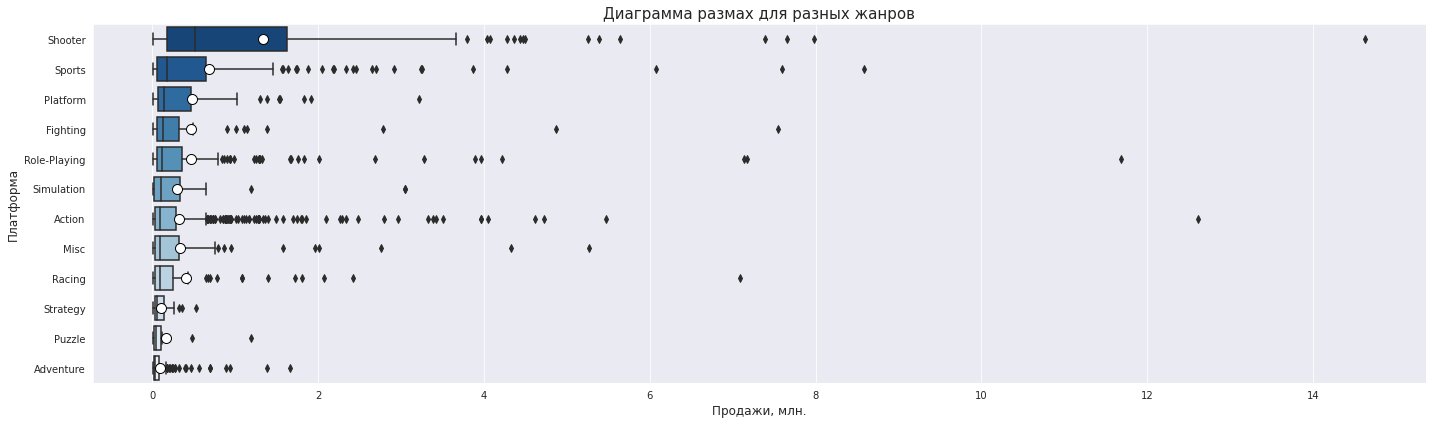

In [39]:
plt.figure(figsize=(20,6))

sns.boxplot(data=data_genre, x='total_sales', y='genre', showmeans=True, order=my_order, palette="Blues_r",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Диаграмма размах для разных жанров', fontsize=15)
plt.xlabel('Продажи, млн.', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
#plt.xlim(0, 2)
plt.tight_layout()

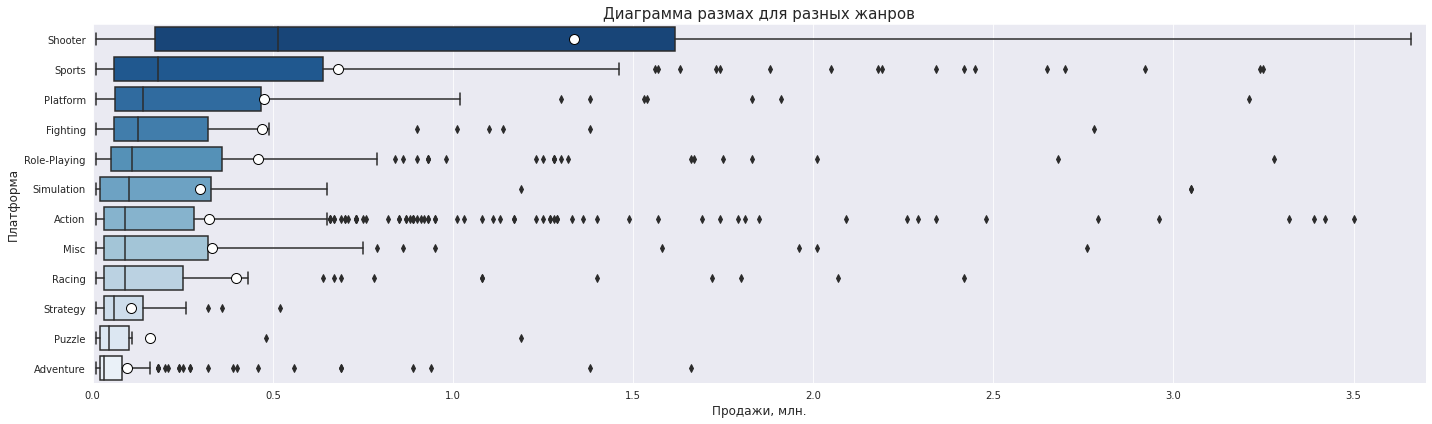

In [40]:
plt.figure(figsize=(20,6))
sns.boxplot(data=data_genre, x='total_sales', y='genre', showmeans=True, order=my_order, palette="Blues_r",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Диаграмма размах для разных жанров', fontsize=15)
plt.xlabel('Продажи, млн.', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
plt.xlim(0, 3.7)
plt.tight_layout()

Теперь мы можем оценить медианы продаж стабильных жанров, которые приносят доход вне зависимости от платформы. Самый доходный жанр, который пользуется кратной популярностью среди остальных это Shooter

#### Составим портрет пользователя каждого региона

/tmp/ipykernel_1472/3520040137.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_region_na = data_region_na.groupby('group_name').sum().sort_values('na_sales', ascending=False)
/tmp/ipykernel_1472/3520040137.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_region_eu = data_region_eu.groupby('group_name').sum().sort_values('eu_sales', ascending=False)
/tmp/ipykernel_1472/3520040137.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should 

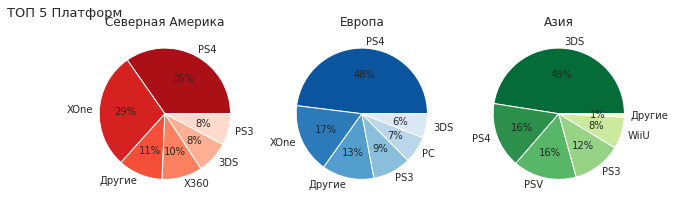

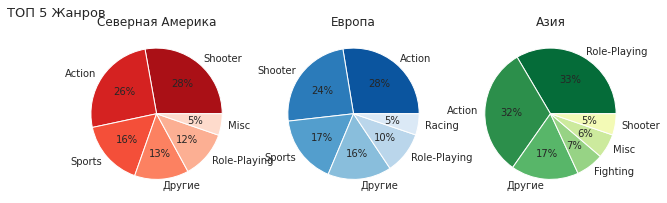

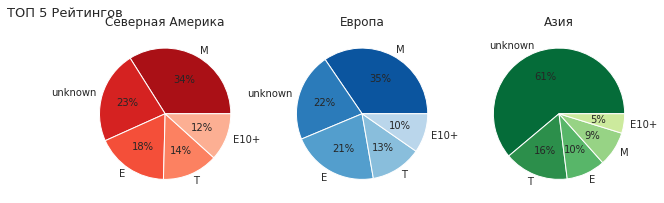

In [41]:
for kind in ['platform', 'genre', 'rating']:

    data_region_na = data_actual.pivot_table(
            index=kind, values='na_sales', aggfunc='sum')\
        .sort_values(by='na_sales', ascending=False).reset_index()
    data_region_na['group_name'] = data_region_na[kind].where(data_region_na[kind].isin(data_region_na[kind].head()), 'Другие')
    data_region_na = data_region_na.groupby('group_name').sum().sort_values('na_sales', ascending=False)

    data_region_eu = data_actual.pivot_table(
            index=kind, values='eu_sales', aggfunc='sum')\
        .sort_values(by='eu_sales', ascending=False).reset_index()
    data_region_eu['group_name'] = data_region_eu[kind].where(data_region_eu[kind].isin(data_region_eu[kind].head()), 'Другие')
    data_region_eu = data_region_eu.groupby('group_name').sum().sort_values('eu_sales', ascending=False)

    data_region_jp = data_actual.pivot_table(
            index=kind, values='jp_sales', aggfunc='sum')\
        .sort_values(by='jp_sales', ascending=False).reset_index()
    data_region_jp['group_name'] = data_region_jp[kind].where(data_region_jp[kind].isin(data_region_jp[kind].head()), 'Другие')
    data_region_jp = data_region_jp.groupby('group_name').sum().sort_values('jp_sales', ascending=False)

    if kind == 'genre':        
        kind_name = 'Жанров'
    elif kind == 'platform':        
        kind_name = 'Платформ'
    else:        
        kind_name = 'Рейтингов'

    sns.set_palette("Reds_r")
    plt.figure(figsize=(10,5))
    plt.subplot(1, 3, 1)
    plt.title('Северная Америка',fontsize=12)
    sns.set_palette("Blues_r")
    plt.pie(data_region_na.na_sales, labels = data_region_na.index, autopct='%.0f%%')
    plt.subplot(1, 3, 2)
    plt.title('Европа',fontsize=12)
    plt.pie(data_region_eu.eu_sales, labels = data_region_eu.index, autopct='%.0f%%')
    sns.set_palette("YlGn_r")
    plt.subplot(1, 3, 3)
    plt.title('Азия',fontsize=12)
    
    plt.pie(data_region_jp.jp_sales, labels = data_region_jp.index, autopct='%.0f%%')
    plt.suptitle ('ТОП 5 {}'.format(kind_name),fontsize=13, x=0.1, y=.8)
    #plt.show()

В Северной Америке доминируют две платформы - PS4 и XOne.  Серди жанров по порядку лидируют Shooter, Action, и Sports. Продаж в возрастной категории больше всего в категории M - "Для взрослых". 

В Европе так же лидируют PS4 и XOne, но продажи PS4 больше в 2 раза чем у XOne. Среди жанров Action на первом месте, затем Shooter и Sports. По рейтингу почти все то же самое, что и у северных американцев.

В Японии картина радикально отличается. Японцы отдают предпочтение мобильной платформе 3DS, и это удивительно, когда 14 летняя платформа делает продажи почти в 3 раза больше, чем остальные. Так же Японцы очень любят RPG, этот жанр занимает первое место. Но так же они любят жанр Action. Это единственное, что их объединяет с другими регионами. А вот Shooter совсем не популярный жанр, занимает последнее место в ТОП5. Больше всего продаж с рейтингом unknown, что связано с тем, что в Японии существует свой рейтинг, а не ESRB.

#### Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Задайте самостоятельно пороговое значение alpha.  
Поясните:  
Как вы сформулировали нулевую и альтернативную гипотезы;  
Какой критерий применили для проверки гипотез и почему.  

Нулевая гипотеза - средние оценки пользователей платформ Xbox One и PC одинаковые.
Альтернативная гипотеза - средние оценки пользователей платформ Xbox One и PC разные.   
Пороговое значение alpha примем за 0.05

In [42]:
data_hypot_XOne = data.query('year_of_release >= 2014')
data_hypot_XOne = data_hypot_XOne.query('platform == "XOne"')
data_hypot_XOne = data_hypot_XOne.query('user_score != -1')['user_score']

data_hypot_PC = data.query('year_of_release >= 2014')
data_hypot_PC = data_hypot_PC.query('platform == "PC"')
data_hypot_PC = data_hypot_PC.query('user_score != -1')['user_score']
alpha = 0.05


results = st.ttest_ind(data_hypot_XOne, data_hypot_PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

display(data_actual.query('platform in ["XOne", "PC"] & user_score != -1')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median']))       

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


,count,mean,median
,user_score,user_score,user_score
platform,,,
PC,122,6.298361,6.8
XOne,165,6.594545,6.8


Нулевая гипотеза - средние оценки пользователей жанров Action и Sports одинаковые.  
Альтернативная гипотеза - средние оценки пользователей жанров Action и Sports различаются   
Пороговое значение alpha примем за 0.05

In [43]:
data_hypot_Action = data.query('year_of_release >= 2014')
data_hypot_Action = data_hypot_Action.query('genre == "Action"')
data_hypot_Action = data_hypot_Action.query('user_score != -1')['user_score']

data_hypot_Sports = data.query('year_of_release >= 2014')
data_hypot_Sports = data_hypot_Sports.query('genre == "Sports"')
data_hypot_Sports = data_hypot_Sports.query('user_score != -1')['user_score']
alpha = 0.05


results = st.ttest_ind(data_hypot_Action, data_hypot_Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

display(data_actual.query('genre in ["Action", "Sports"] & user_score != -1')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median']))    


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


,count,mean,median
,user_score,user_score,user_score
genre,,,
Action,297,6.760606,7.1
Sports,127,5.225197,5.5


Нулевая гипотеза была сформулирована согласно правилу - когда мы выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такая: «разницы нет, исследуемые параметры равны».   
Альтернативная гипотеза - двусторонняя, т.к. есть возможное отклонение и в большую и в меньшую стороны. 

Мы взяли выборки из двух генеральных савокупностей что бы проверить гипотезы о равенстве среднего этих двух генеральных савокупностей.  
Для этого использовали метод scipy.stats.ttest_ind.

Проверка гипотез показала:
- мы не можем отвергнуть гипотезу о том, что средние оценки пользователей платформ Xbox One и PC одинаковые
- мы принимаем альтернативную гипотезу - средние оценки пользователей жанров Action и Sports различаются  

## Выводы

До 1994 года релизы игр были единичными. После 1994 игровая индустрия начала набирать обороты вплоть до 2008 года, когда количество выпускаемых игр начало резко сокращаться.  
Возможно, с ростом технологий и возможностей, новые игры стали требовать больших трудозатрат для их выпуска. 
   
PS2 - это платформа, которая совершила продаж больше всех остальных.  
Средний жизненный цикл платформ - 8 лет.  
Многие платформы уже завершили свой жизенный цикл, или завершают. 
На данный момент остается всего 4-5 платформ, которые продолжат свой жизненный цикл и будут приносить доход. 
  
Так как две новые стационарные платформы PS4 и XOne активно подавляют своих конкурентов, мы взяли актуальный перриод, начиная с 2014 года включительно.   
Во многом затухание других платформ связано с их выходом. Скорее всего они заменят все другие стационарные платформы.  
Мобильные платформы, такие как 3Ds продолжат существовать и приносить доход, по крайней мере, до выхода прямых конкурентов.  
Что касается PC, он вне времени, но продажи на нем малы 
  
Стабильную медиану продажи показывает приставка XOne, хоть она сильно отстает по суммарным продажам от PS4. 
WiiU так же показывает стабильнкю высокую медиану, но суммарные продажи малы. 
У Wii медиана почти такая же как и у WiiU но суммарные продажи крайне малы, и скорее всего, они будут стремиться к 0. 
Больше всего продаж за актуальный период совершает PS4, но как видно из графика размаха этот успех вызван одиночными выбросами - хитами продаж
На такие игры нам следует обратить внимание, продажи будут сильно завиисеть от выхода продолжений и популярности этих игр.  
Так же их предшественники PS3 и X360 тоже приносят доход и имеют свои хиты, которые держат эти приставки на плаву, скорее всего они будут вытесняться новым поколением платформ. 
Медиана продаж у портативной приставки 3DS ниже, но она показывает хорошие суммарные продажи, имеет своего преданного покупателя, не смотря на то, что платформе уже 14 лет, для платформы было выпущено несколько высокоприбыльных хитов.
PC, PSV, PSP выглядат аутсайдерами на фоне остальных.
Надо смотеть на продажи отдельно по регионам, и только тогда делать выводы для каких платформ и игр запускать рекламную кампанию.


##### Про зависимость продаж от оценок пользователей:  
Для PS4 между оценкой пользователей и продажами наблюдается слабая обратная корреляционная связь.  
Между оценкой критиков и продажами наблюдается прямая средняя корреляционная связь.  
При прогнозе продаж надежнее пологаться на отзывы критиков.  
  
Для XOne можно сделать те же выводы что и для PS4, данные очень похожи.
  
Для 3DS зависимость продаж от оценок пользователя - прямая, в отличие от PS4, и попадает в классификацию слабой прямой зависимости.  
Зависимость продаж от оценок критиков, так же прямая. Прямая средняя. Но слабее чем у PS4 и XOne.
  
Для PC зависимость продаж от оценок пользователя - слабая обратная корреляционная связь.
Зависимость продаж от оценок критиков - слабая прямая.  
  
##### Про зависимость продаж от жанра:
Рассмотрев подробно медианные значения продаж разных жанров можно выделить самые стабильные и универсальные для всех платформ. Это по порядку убывания - Shooter, Sports, Platform, Fighting и RPG. 
Но есть один примечательный момент - единственная игра GTA SA вывела жанр Action на первые - вторые места по продажам.
  
##### Про портреты пользователей из разных регионов:    
В Северной Америке доминируют две платформы - PS4 и XOne.  Серди жанров по порядку лидируют Shooter, Action, и Sports. Продаж в возрастной категории больше всего в категории M - "Для взрослых". 

В Европе так же лидируют PS4 и XOne, но продажи PS4 больше в 2 раза чем у XOne. Среди жанров Action на первом месте, затем Shooter и Sports. По рейтингу почти все то же самое, что и у северных американцев.

В Японии картина радикально отличается. Японцы отдают предпочтение мобильной платформе 3DS, и это удивительно, когда 14 летняя платформа делает продажи почти в 3 раза больше, чем остальные. Так же Японцы очень любят RPG, этот жанр занимает первое место. Но так же они любят жанр Action. Это единственное, что их объединяет с другими регионами. А вот Shooter совсем не популярный жанр, занимает последнее место в ТОП5. Больше всего продаж с рейтингом unknown, что связано с тем, что в Японии существует свой рейтинг, а не ESRB.
  
##### Про проверку гипотез:
мы не можем отвергнуть гипотезу о том, что средние оценки пользователей платформ Xbox One и PC одинаковые.  
мы принимаем альтернативную гипотезу - средние оценки пользователей жанров Action и Sports различаются

#### Рекомендации для рекламной кампании:
Регионы Европы и Северной америки во многом похожи. Продвигать в этих регионах нужно игры для платформ XOne и PS4, жанры для регионов - в приоритетном порядке Shooter, Sports, Action, Rpg.    
В рейтинге M самое большое количество продаж.

В рекламной кампании необходимо обращать внимание на хиты - игры, которые выбиваются из массы и совершают большое количество продаж. Продажи будут сильно завиисеть от выхода продолжений и популярности этих игр. 

Для японского региона нужна другая стратегия. Главное сосредоточиться на играх под мобильную платформу 3DS, и если бюджет позволит, на стационарную PS4. Жанры для японии - в приоритетном порядке Rpg, Action, Fighting, и возможно Shooter.   
Рейтинг ESRB для Японии можно не учитывать, у них свой рейтинг.

В рекламной кампании для приставок PS4 и XOne стоит прислушаться к оценкам критиков, т.к. мы наблюдаем среднюю кореляцию между отзывами и продажами.





